## Import the necessary packages

In [1]:
import generate_data as gdata
from sklearn import metrics
import numpy as np
import multiway_via_spectral as multiwayvs
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import SpectralClustering
from tensorly.decomposition import CP, Tucker
from sklearn.metrics.cluster import adjusted_rand_score
import functions 
from pymatreader import read_mat
from sklearn.cluster import KMeans

#  Effectiveness of MCAM algorithm with different value of signal strength for a rank-one tensor

In [6]:
# data TFS with one cluster
# ---------  Data TFS -------------   
m, k, size = 100, 1, 12
#--------real cluster---------
real = []
for i in range(k):
    real = real + [i for p in range(size)]
real  = real + [k for i in range(m - (k*size))]

#-----------Sum of rank-one tensor ----------------
std_cluster_spectralClustering, std_cluster_affinityPropagation = [], []
cluster_spectralClustering, cluster_affinityPropagation = [], [] # will contain list of tuple ( result_spectralClsutering, result_AffinityPropagation)
for gamma in range(30, 81, 5):
    spectral, aff = [], []
    for _ in range(10):
        data = gdata.Generate_tensorBiclustering(m=m, n1=m,n2=m,k1=size,k2=size,k3=size, cluster=k, gamma=gamma)
        data = data.first_data()

        core_size = [k+1,k+1,k+1]
        cp_rank = [1,1,1]   # we do not use it in this experiment, then class need it as a parameter
        cluster = functions.multiway_via_spec_dec(data, core_size, cp_rank, real)
        ari_s = cluster[0][0]
        ari_a = cluster[1][0]
        spectral.append(np.mean(ari_s))
        aff.append(np.mean(ari_a))

    cluster_spectralClustering.append(np.mean(spectral))
    std_cluster_spectralClustering.append(np.std(spectral))
    cluster_affinityPropagation.append(np.mean(aff))
    std_cluster_affinityPropagation.append(np.std(aff))

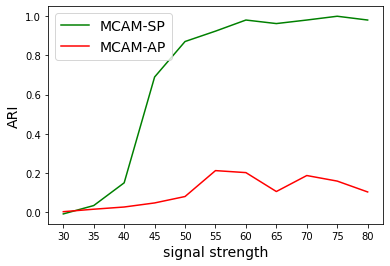

In [7]:
import math
x = [i for i in range(30,81,5)]
plt.plot(x,cluster_spectralClustering, c ='g',label="MCAM-SP")
plt.errorbar(x, cluster_spectralClustering, std_cluster_spectralClustering, linestyle='None', marker='')
plt.plot(x,cluster_affinityPropagation, c ='r',label="MCAM-AP")
plt.errorbar(x, cluster_affinityPropagation, std_cluster_affinityPropagation, linestyle='None', marker='')
new_list = range(math.floor(min(x)), math.ceil(max(x)+1),5)
plt.xticks(new_list)
plt.legend(loc="upper left", fontsize=14)
plt.ylabel("ARI",  fontsize=14)
plt.xlabel("signal strength",  fontsize=14)
#plt.savefig('./image/SNR_D100_G30_80_C1.png')
plt.show()

#  Effectiveness of MCAM algorithm with different value of signal strength for a n rank-one tensor

 * n = 8

In [8]:
# data TFS with multiple clusters
# ---------  Data TFS -------------   
m, k, size = 100, 8, 12
#--------real cluster---------
real = []
for i in range(k):
    real = real + [i for p in range(size)]
real  = real + [k for i in range(m - (k*size))]

#-----------Sum of rank-one tensor ----------------
std_cluster_spectralClustering, std_cluster_affinityPropagation = [], []
cluster_spectralClustering, cluster_affinityPropagation = [], [] # will contain list of tuple ( result_spectralClsutering, result_AffinityPropagation)
cluster_tucker, cluster_cp, cluster_tbm = [], [], []
std_tucker, std_cp, std_tbm = [], [], []
NMI_spectral, NMI_aff, NMI_tucker, NMI_cp, NMI_tbm =[], [], [], [], []
STD_spectral, STD_aff, STD_tucker, STD_cp, STD_tbm = [], [], [], [], []


cp_tucker = True
tbm_method = True

for gamma in range(30, 81, 5):
    spectral, aff, tucker, cp, tbm = [], [], [], [], []
    nmi_spectral, nmi_aff, nmi_tucker, nmi_cp, nmi_tbm = [], [], [], [], []
    for _ in range(10):
        data = gdata.Generate_tensorBiclustering(m=m, n1=m,n2=m,k1=size,k2=size,k3=size, cluster=k, gamma=gamma)
        data = data.first_data()

        core_size = [k+1,k+1,k+1]
        cp_rank = [8,8,8]  
        cluster = functions.multiway_via_spec_dec(data,core_size,cp_rank,real,cp_tucker=cp_tucker,tbm=tbm_method)
        ari_s = cluster[0][0]
        ari_a = cluster[1][0]
        nmi_s = cluster[0][1]
        nmi_a = cluster[1][1]
        
        spectral.append(np.mean(ari_s))
        aff.append(np.mean(ari_a))
        nmi_spectral.append(np.mean(nmi_s))
        nmi_aff.append(np.mean(nmi_a))
        if cp_tucker == True :
            ari_tucker = cluster[2][0]
            ari_cp = cluster[3][0]
            nmi_tuck = cluster[2][1]
            nmi_c = cluster[3][1]
            tucker.append(np.mean(ari_tucker))
            cp.append(np.mean(ari_cp))
            nmi_tucker.append(np.mean(nmi_tuck))
            nmi_cp.append(np.mean(nmi_c))
        if tbm_method == True :
            ari_tbm = cluster[4][0]
            nmi_tb = cluster[4][1]
            tbm.append(np.mean(ari_tbm))
            nmi_tbm.append(np.mean(nmi_tb))


    cluster_spectralClustering.append(np.mean(spectral))
    std_cluster_spectralClustering.append(np.std(spectral))
    cluster_affinityPropagation.append(np.mean(aff))
    std_cluster_affinityPropagation.append(np.std(aff))
    
    NMI_spectral.append(np.mean(nmi_spectral))
    NMI_aff.append(np.mean(nmi_aff))

    STD_spectral.append(np.std(nmi_spectral))
    STD_aff.append(np.std(nmi_aff))

    
    if cp_tucker == True :
        cluster_tucker.append(np.mean(tucker))
        std_tucker.append(np.std(tucker))
        cluster_cp.append(np.mean(cp))
        std_cp.append(np.std(cp))
        NMI_tucker.append(np.mean(nmi_tucker))
        NMI_cp.append(np.mean(nmi_cp))
        STD_tucker.append(np.std(nmi_tucker))
        STD_cp.append(np.std(nmi_cp))
    if tbm_method == True :
        cluster_tbm.append(np.mean(tbm))
        std_tbm.append(np.std(tbm))
        NMI_tbm.append(np.mean(nmi_tbm))
        STD_tbm.append(np.std(nmi_tbm))
        

/home/faneva/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(


In [ ]:
import math     # ARI
x = [i for i in range(30,81,5)]
plt.plot(x,cluster_spectralClustering, c ='g',label="MCAM-SP")
plt.errorbar(x, cluster_spectralClustering, std_cluster_spectralClustering, linestyle='None', marker='')
plt.plot(x,cluster_affinityPropagation, c ='r',label="MCAM-AP")
plt.errorbar(x, cluster_affinityPropagation, std_cluster_affinityPropagation, linestyle='None', marker='')
plt.plot(x, cluster_tucker, c='b', label="Tucker+k-means")
plt.errorbar(x, cluster_tucker, std_tucker, linestyle='None', marker='')
plt.plot(x, cluster_cp, c='y', label="CP+k-means")
plt.errorbar(x, cluster_cp, std_cp, linestyle='None', marker='')
plt.plot(x, cluster_tbm, c='c', label="TBM")
plt.errorbar(x, cluster_tbm, std_tbm, linestyle='None', marker='')

new_list = range(math.floor(min(x)), math.ceil(max(x)+1),5)
plt.xticks(new_list)
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.ylabel("ARI",  fontsize=14)
plt.xlabel("signal strength",  fontsize=14)
#plt.savefig('./image/mcam_and_other_tfs_data_ari.png',bbox_inches='tight')
plt.show()

In [ ]:
import math     # NMI
x = [i for i in range(30,81,5)]
plt.plot(x,NMI_spectral, c ='g',label="MCAM-SP")
plt.errorbar(x, NMI_spectral, STD_spectral, linestyle='None', marker='')
plt.plot(x,NMI_aff, c ='r',label="MCAM-AP")
plt.errorbar(x, NMI_aff, STD_aff, linestyle='None', marker='')
plt.plot(x, NMI_tucker, c='b', label="Tucker+k-means")
plt.errorbar(x, NMI_tucker, STD_tucker, linestyle='None', marker='')
plt.plot(x, NMI_cp, c='y', label="CP+k-means")
plt.errorbar(x, NMI_cp, STD_cp, linestyle='None', marker='')
plt.plot(x, NMI_tbm, c='c', label="TBM")
plt.errorbar(x, NMI_tbm, STD_tbm, linestyle='None', marker='')

new_list = range(math.floor(min(x)), math.ceil(max(x)+1),5)
plt.xticks(new_list)
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.ylabel("NMI",  fontsize=14)
plt.xlabel("signal strength",  fontsize=14)
#plt.savefig('./image/mcam_and_other_tfs_data_nmi.png',bbox_inches='tight')
plt.show()

In [ ]:
m, k, size = 100, 8, 12
cp_tucker_rank = 8
#--------real cluster---------
real = []
for i in range(k):
    real = real + [i for p in range(size)]
real  = real + [k for i in range(m - (k*size))]
#-----------data TFS ----------------

#ari_spectral, nmi_spectral, ari_AffProp, nmi_AffProp = [], [], [], []
ari_cp, nmi_cp = [], []
ari_tucker, nmi_tucker = [], []
experiments = 10
mean_ari_spec, mean_nmi_spec, mean_ari_ap, mean_nmi_ap = [], [], [], []
for R in range(1,11): 
    for i in range(experiments):
        data = gdata.Generate_tensorBiclustering(m=m, n1=m,n2=m,k1=size,k2=size, k3=size, cluster=k, gamma=60)
        data = data.first_data()
        # --------------------------------
        multiway = mcam_r.Multiway_via_spectral(data, k=[k+1,k+1,k+1], r=R)  
        cluster = multiway.get_result()  
        # spectral clustering and affinity propagation
        spectral = [a[0] for a in cluster]
        AffProp = [a[1] for a in cluster]
        res_ari_spectral, res_nmi_spectral = [], []
        res_ari_AffProp, res_nmi_AffProp = [], []
        for j in range(3):
            res_ari_spectral.append(metrics.adjusted_rand_score(real, spectral[j]))
            res_nmi_spectral.append(metrics.adjusted_mutual_info_score(real, spectral[j]))
            #---------------------------------------
            res_ari_AffProp.append(metrics.adjusted_rand_score(real, AffProp[j]))
            res_nmi_AffProp.append(metrics.adjusted_mutual_info_score(real, AffProp[j]))
            if len(set(AffProp[j])) != k+1:
                er.append(len(set(AffProp[j])))
        
        ari_spectral.append(np.mean(res_ari_spectral))
        nmi_spectral.append(np.mean(res_nmi_spectral))
        ari_AffProp.append(np.mean(res_ari_AffProp))
        nmi_AffProp.append(np.mean(res_nmi_AffProp))
    
    mean_ari_spec.append(np.mean(ari_spectral))
    mean_nmi_spec.append( np.mean(nmi_spectral))
    mean_ari_ap.append(np.mean(ari_AffProp))
    mean_nmi_ap.append( np.mean(nmi_AffProp))
print(er)

In [ ]:
# boxplot 
plt.boxplot([mean_ari_spec, mean_nmi_spec, mean_ari_ap, mean_nmi_ap],widths=0.5, labels=["ARI-SC","NMI-SC","ARI-AP","NMI-AP"])
#plt.savefig('./image/boxplot_tfs.png')
plt.show()

# Performance of CP+k-means and Tucker+k-means with different rank of decomposition  

    * We test the two method in the mode-1 of the tensor

In [14]:
#--------- data TFS (many rank) -------CP and Tucker-----------
m, k, size = 100, 8, 12
#--------real cluster---------
real = []
for i in range(k):
    real = real + [i for p in range(size)]
real  = real + [k for i in range(m - (k*size))]
cp, tucker = [], []
# ----------------------------------
experiments = 1
rank_max = 10
# ----------------------------------
for j in range(experiments):
    # ---------Generate data-------------------
    data = gdata.Generate_tensorBiclustering(m=m, n1=m,n2=m,k1=size,k2=size,k3=size, cluster=k, gamma=60)
    data = data.first_data()

    #-------The method of CP and Tucker-----------------------------
    res_ari_cp ,res_ari_tucker = [], []
    for i in range(1,rank_max+1):
        a = CP(rank=i).fit_transform(data) 
        b = Tucker(rank=[i,i,i]).fit_transform(data) 
        label_cp = KMeans(n_clusters=k+1, random_state=0).fit(a[1][0])
        label_tucker = KMeans(n_clusters=k+1, random_state=0).fit(b[1][0])
        res_ari_cp.append(metrics.adjusted_rand_score(real, label_cp.labels_))
        res_ari_tucker.append(metrics.adjusted_rand_score(real, label_tucker.labels_))
    cp.append(res_ari_cp)
    tucker.append(res_ari_tucker)
    
mean_cp, std_cp, mean_tucker, std_tucker = [], [], [], []
for i in range(rank_max):
    intermediate_cp, intermediate_tucker = [], []
    for j in range(experiments):
        intermediate_cp.append(cp[j][i])
        intermediate_tucker.append(tucker[j][i])
    mean_cp.append(np.mean(intermediate_cp))
    std_cp.append(np.std(intermediate_cp))
    mean_tucker.append(np.mean(intermediate_tucker))
    std_tucker.append(np.std(intermediate_tucker))

In [ ]:
import math
lim = rank_max
x = [i for i in range(1,lim +1)]
plt.plot(x,mean_cp,c='b', label="CP+k-means")
plt.errorbar(x, mean_cp, std_cp, linestyle='None', marker='', c ='b')

plt.plot(x,mean_tucker, c ='g',label="Tucker+k-means")
plt.errorbar(x, mean_tucker, std_tucker, linestyle='None', marker='', c='g')
new_list = range(math.floor(min(x)), math.ceil(max(x))+1,2)
plt.xticks(new_list)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel("ARI",  fontsize=14)
plt.xlabel("rank of tensor decomposition",  fontsize=14)
#plt.savefig('./image/cp_tucker_one_mode_60.png')
plt.show()


# Second dataset

In [ ]:
# mode precises the mode clustering (0,1,or 2)
m, k = 200, 20   # m is the dimension of data, k is the number of clusters
cp_tucker_rank = 10
er = []
#-------------------------------
r, real = [i for i in range(m)], [i for i in range(m)]
r = np.array_split(r, k)
r = [list(i) for i in r]
for i in range(k):
    for j in r[i]:
        real[j] = i
#-----------data TBM----------------
ari_spectral, nmi_spectral, ari_AffProp, nmi_AffProp = [], [], [], []
ari_cp, nmi_cp = [], []
ari_tucker, nmi_tucker = [], []
ari_tbm, nmi_tbm = [], []
experiments = 10
r = []

for i in range(experiments):
    generatedata = gdata.Generate_tensorBiclustering(m = m, k=k)
    data = generatedata.second_data(-2,2,1)
    
    core_size = [k,k,k]
    cp_rank = [cp_tucker_rank,cp_tucker_rank,cp_tucker_rank]
    cluster = functions.multiway_via_spec_dec(data, core_size, cp_rank, real, cp_tucker=True, tbm=True)
    #print(cluster)
    # --------------------------------

    ari_spectral.append(np.mean(cluster[0][0]))
    ari_AffProp.append(np.mean(cluster[1][0]))
    ari_tucker.append(np.mean(cluster[2][0]))
    ari_cp.append(np.mean(cluster[3][0]))
    ari_tbm.append(np.mean(cluster[4][0]))
    
    nmi_spectral.append(np.mean(cluster[0][1]))
    nmi_AffProp.append(np.mean(cluster[1][1]))
    nmi_tucker.append(np.mean(cluster[2][1]))
    nmi_cp.append(np.mean(cluster[3][1]))
    nmi_tbm.append(np.mean(cluster[4][1]))
    
    
print("ARI Spectral clustering : ", np.mean(ari_spectral)," +/- ", np.std(ari_spectral))
print("ARI affinity propagation : ", np.mean(ari_AffProp)," +/- ", np.std(ari_AffProp))
print("ARI Tucker: ", np.mean(ari_tucker)," +/- ", np.std(ari_tucker))
print("ARI CP: ", np.mean(ari_cp)," +/- ", np.std(ari_cp))
print("ARI TBM : ",np.mean(ari_tbm), "+/- ", np.std(ari_tbm))
print("\n")
print("NMI spectral clustering : ", np.mean(nmi_spectral), " +/- ", np.std(nmi_spectral))
print("NMI affinity propagation : ", np.mean(nmi_AffProp), " +/- ", np.std(nmi_AffProp))
print("NMI Tucker: ", np.mean(nmi_tucker), " +/- ", np.std(nmi_tucker))
print("NMI CP: ", np.mean(nmi_cp), " +/- ", np.std(nmi_cp))
print("NMI TBM : ",np.mean(nmi_tbm), "+/- ", np.std(nmi_tbm))

In [ ]:
# MCAM method with different value of r
import mcam_for_fix_r as mcam_r
# mode precises the mode clustering (0,1,or 2)
m, k = 200, 20   # m is the dimension of data, k is the number of clusters
er = []
#-------------------------------
r, real = [i for i in range(m)], [i for i in range(m)]
r = np.array_split(r, k)
r = [list(i) for i in r]
for i in range(k):
    for j in r[i]:
        real[j] = i
#-----------data TBM----------------
ari_spectral, nmi_spectral, ari_AffProp, nmi_AffProp = [], [], [], []
ari_cp, nmi_cp = [], []
ari_tucker, nmi_tucker = [], []
experiments = 10
r = []
mean_ari_spec, mean_nmi_spec, mean_ari_ap, mean_nmi_ap = [], [], [], []
for R in range(1,11): 
    for i in range(experiments):
        generatedata = gdata.Generate_tensorBiclustering(m = m, k=k)
        data = generatedata.second_data(-2,2,1)
        # --------------------------------
        multiway = mcam_r.Multiway_via_spectral(data, k=[20,20,20], r=R)  # k is the number of clusters
        cluster = multiway.get_result()  
        # separation of the spectral clustering and the affinity propagation
        spectral = [a[0] for a in cluster]
        AffProp = [a[1] for a in cluster]
        res_ari_spectral, res_nmi_spectral = [], []
        res_ari_AffProp, res_nmi_AffProp = [], []
        for j in range(3):
            res_ari_spectral.append(metrics.adjusted_rand_score(real, spectral[j]))
            res_nmi_spectral.append(metrics.adjusted_mutual_info_score(real, spectral[j]))
            #---------------------------------------
            res_ari_AffProp.append(metrics.adjusted_rand_score(real, AffProp[j]))
            res_nmi_AffProp.append(metrics.adjusted_mutual_info_score(real, AffProp[j]))
            if len(set(AffProp[j])) != k:
                er.append(len(set(AffProp[j])))
        
        ari_spectral.append(np.mean(res_ari_spectral))
        nmi_spectral.append(np.mean(res_nmi_spectral))
        ari_AffProp.append(np.mean(res_ari_AffProp))
        nmi_AffProp.append(np.mean(res_nmi_AffProp))
    
    mean_ari_spec.append(np.mean(ari_spectral))
    mean_nmi_spec.append( np.mean(nmi_spectral))
    mean_ari_ap.append(np.mean(ari_AffProp))
    mean_nmi_ap.append( np.mean(nmi_AffProp))
print(er)

In [ ]:
# boxplot 
plt.boxplot([mean_ari_spec, mean_nmi_spec, mean_ari_ap, mean_nmi_ap],widths=0.5, labels=["ARI-SC","NMI-SC","ARI-AP","NMI-AP"])
#plt.savefig('./image/boxplot_tbm.png')
plt.show()

# REAL DATA 

    * 

In [16]:
source = read_mat('../../data/Flow_Injection/fia.mat')
dataShape = source['DimX']
data = source['X']
shape = []
for i in range(3):
    shape.append(int(dataShape[i]) )
data = np.reshape(data, shape, order="F")
print("data shape : ", data.shape)

data shape :  (12, 100, 89)


In [17]:
# Find the number of clusters in the three modes
# We use  C_Prime it to the silhouette method
core_size= [2,2,2]    # the user can guess here because we onle need the similarity matrices C_Prime
result_ariSLICE_hac, result_ariSLICEk_means = [], []
multiway = multiwayvs.Multiway_via_spectral(data, k=core_size) 
estimation = multiway.get_result()
C_prime = multiway.get_c_prime()  # list of three similarity matrices (from the three mode)

In [ ]:
# Plot
functions.silhouette_tensor( (2,10,1),(2,30,1),(2,30,1),data,C_prime)

In [ ]:
# core tensor can be interpreted as the number of cluster in each mode
core_size = [2,2,2] 
real = []
cp_rank = [2,2,2]
cluster = functions.multiway_via_spec_dec(data, core_size, cp_rank, real, cp_tucker=True, tbm=True)

for i in cluster:
    print(i[2])

In [ ]:
# Davies Bouldin Index
# plot
functions.DaviesBouldinIndex( (2,10,1),(2,30,1),(2,30,1),data,C_prime)

In [ ]:
core_size = [3,2,4] 
real = []
cp_rank = [3,2,4]
cluster = functions.multiway_via_spec_dec(data, core_size, cp_rank, real, cp_tucker=True, tbm=True)

for i in cluster:
    print(i[2])   # we are interested in the RMSE